In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
# Import data
df= pd.read_csv('Crop_recommendation.csv')

In [3]:
# View first five rows of the data
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
# Unique values of the label column
print(df['label'].unique())

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [5]:
# check missing values in columns
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
# Basic statistics of the numerical data
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
# Column names of the dataset
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [8]:
# Assign the numerical features to a variable
conditions= df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]

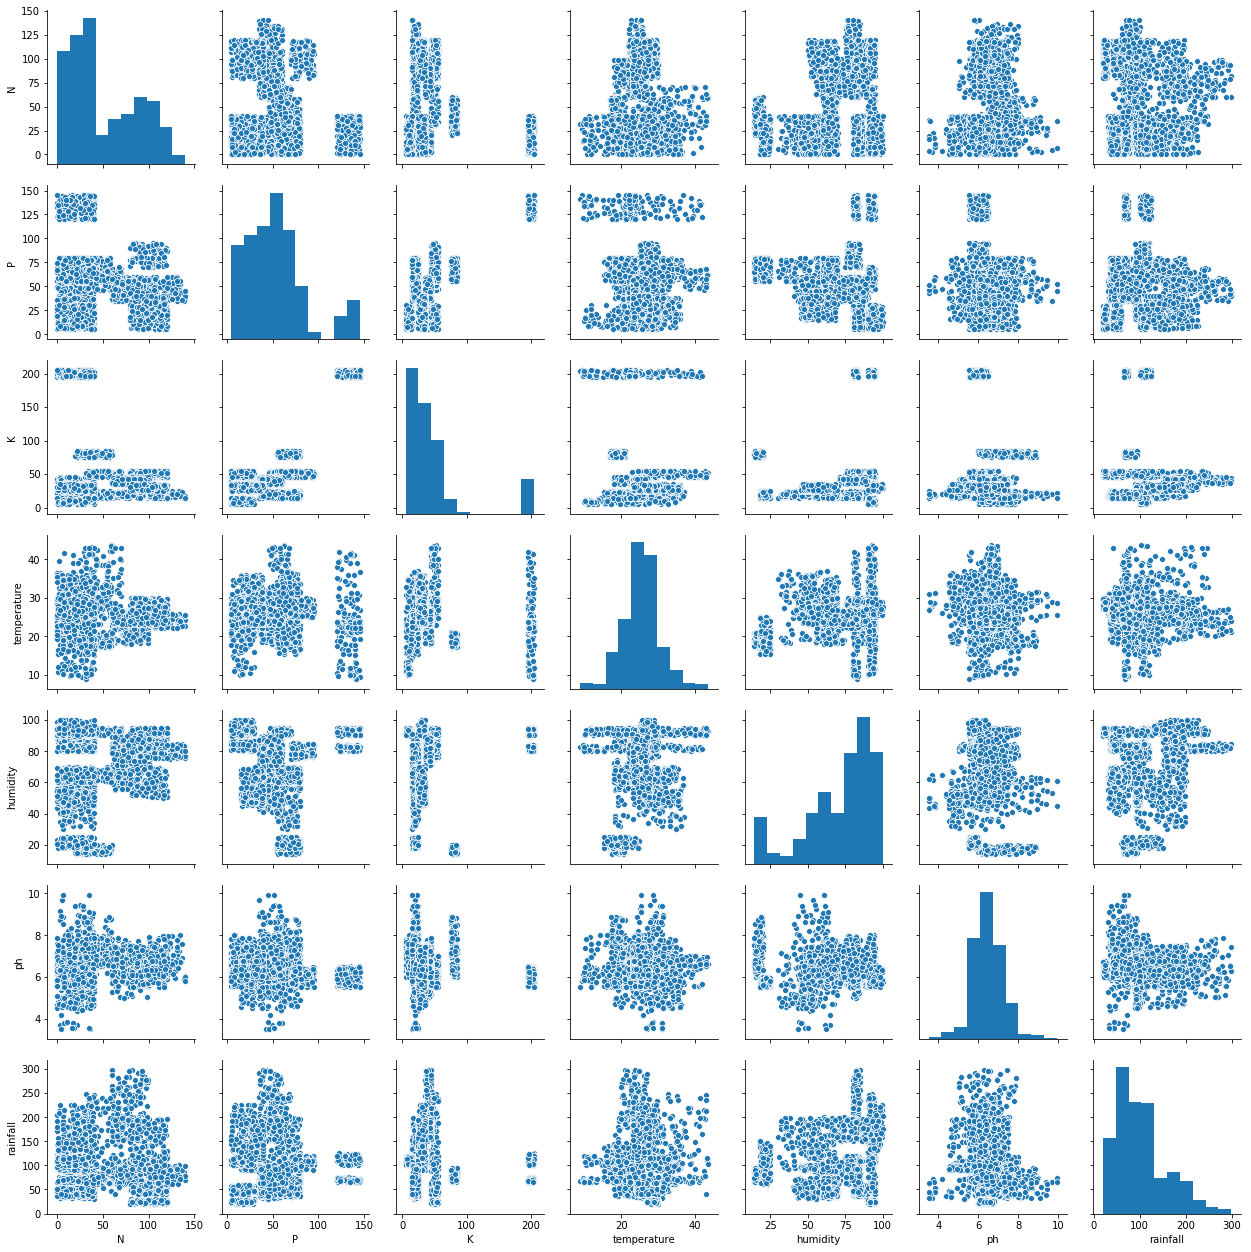

In [9]:
# Scatterplots between each numerical feature
sns.pairplot(conditions)

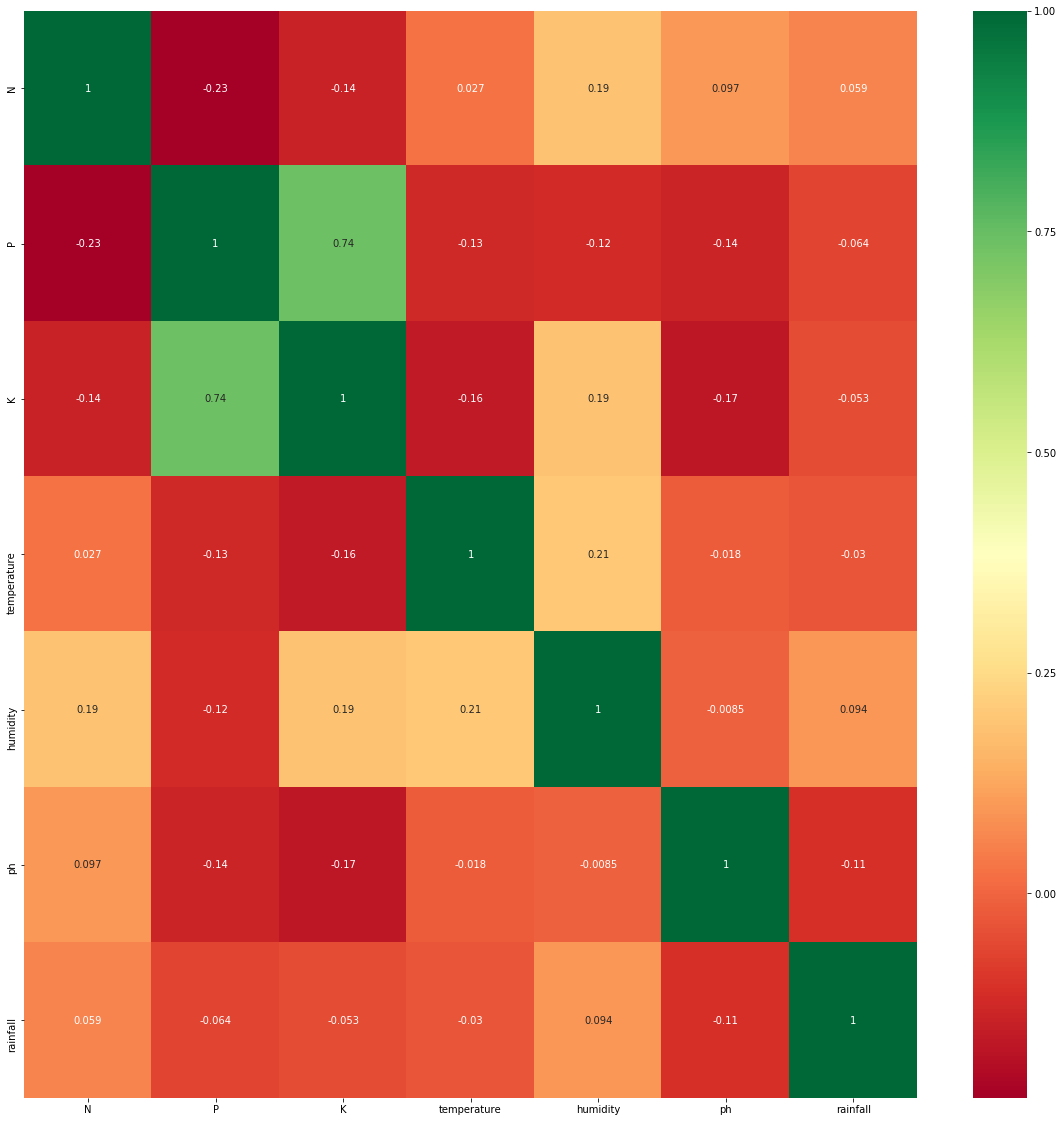

In [10]:
# Correlation between each pair of features
corrmat= conditions.corr()
top_corr_features= corrmat.index
plt.figure(figsize=(20,20))

p= sns.heatmap(conditions[top_corr_features].corr(), annot=True, cmap= 'RdYlGn')

In [11]:
# Independent variables
X= conditions

In [12]:
#df['code']= pd.factorize(df['label'])[0]+1

In [13]:
# Dependent variable 
y= df['label']

In [14]:
# Split data into train and test sets
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size= 0.33, random_state=42)

In [15]:
# Create a model and fit to the training data
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\tha87\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tha87\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
# Predict with the test data
y_predict= model.predict(X_test)
y_predict

array(['muskmelon', 'watermelon', 'papaya', 'papaya', 'apple', 'mango',
       'apple', 'mothbeans', 'mungbean', 'lentil', 'blackgram', 'coconut',
       'pomegranate', 'jute', 'coconut', 'pomegranate', 'apple', 'cotton',
       'rice', 'muskmelon', 'coffee', 'papaya', 'orange', 'papaya',
       'chickpea', 'jute', 'mungbean', 'orange', 'pigeonpeas', 'rice',
       'pomegranate', 'mothbeans', 'jute', 'lentil', 'jute', 'blackgram',
       'jute', 'chickpea', 'chickpea', 'kidneybeans', 'rice', 'mango',
       'blackgram', 'maize', 'mothbeans', 'maize', 'pigeonpeas',
       'coconut', 'muskmelon', 'maize', 'blackgram', 'coffee', 'grapes',
       'mungbean', 'coffee', 'kidneybeans', 'cotton', 'apple', 'banana',
       'lentil', 'watermelon', 'coconut', 'lentil', 'orange', 'papaya',
       'blackgram', 'orange', 'rice', 'muskmelon', 'pigeonpeas',
       'muskmelon', 'coconut', 'jute', 'banana', 'lentil', 'papaya',
       'banana', 'cotton', 'watermelon', 'orange', 'coffee', 'chickpea',
    

In [17]:
# calculate the accuracy of the prediction between test and predicted set
metrics.accuracy_score(y_test, y_predict)

0.9201101928374655

In [38]:
import pickle
# Open a file, where data need to be stored
file = open('logistic_reg_model.pkl','wb')

# Dump information to the file
pickle.dump(model, file)

In [18]:
#model = RandomForestClassifier()

In [19]:
#from sklearn.model_selection import RandomizedSearchCV

In [20]:
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [2,4]
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]

In [21]:
# # Create the param grid
# param_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(param_grid)

In [22]:
# clf = RandomizedSearchCV(estimator= model, param_distributions = param_grid, cv = 3, verbose=True, random_state=42, n_jobs=1)

In [23]:
# clf.fit(X_train, y_train)

In [24]:
# clf.score(X_test, y_test)

In [25]:
# clf.best_params_

In [26]:
# clf.best_score_

In [27]:
#from sklearn.linear_model import LogisticRegression
# random_grid = [    
#     {'C' : np.logspace(-4, 4, 20),
#     'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
#     'max_iter' : [100, 1000,2500, 5000]
#     }
# ]

In [28]:
#from sklearn.ensemble import RandomForestClassifier

In [29]:
#clf = RandomForestClassifier(max_depth=5, random_state=0)

In [30]:
#clf.fit(X_train, y_train)

In [31]:
#regressor.score(X_test, y_test)

In [32]:
#y_pred= regressor.predict(X_test)

In [33]:
#from sklearn.metrics import confusion_matrix

In [34]:
#confusion_matrix(y_test, y_pred)

In [35]:
# cm = confusion_matrix(y_test, y_pred)
# fig = plt.figure()
# ax = fig.add_subplot(111)
# cax = ax.matshow(cm)
# plt.title('Confusion matrix of the classifier')
# fig.colorbar(cax)
# ax.set_xticklabels([''] + labels)
# ax.set_yticklabels([''] + labels)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()

In [36]:
#svclf= SVC(gamma='auto')